# Calcite dissolution as a function of CO2 pressure

http://hydrochemistry.eu/exmpls/calcite.html

In [1]:
%pylab inline
import phreeqpython
pp = phreeqpython.PhreeqPython(database='phreeqc.dat')

Populating the interactive namespace from numpy and matplotlib


## PhreeqPython Calculation

In [4]:
# add solutions
solution0 = pp.add_solution({}) # empty solution
solution1 = pp.add_solution({}).equalize(['Calcite', 'CO2(g)'], [0, -1.7])
solution2 = pp.add_solution({}).equalize(['Calcite', 'CO2(g)'], [0, -3.5])
# create a mixture of solution 1 and 2
solution3 = solution1*0.5 + solution2*0.5

x = []
y = []

for i in range(30):
    solution0.add('CO2', 3.5/30)
    solution0.saturate('Calcite')    
    x.append(solution0.sr('CO2(g)')*100)
    y.append(solution0.total_element('Ca'))

## Plotting the results

Text(0.5,1,'Calcite Equilibrium')

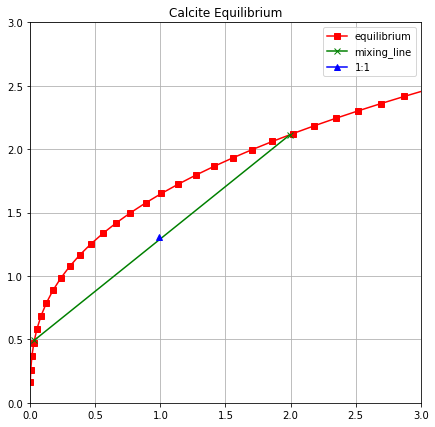

In [5]:
plt.figure(figsize=[7,7])
plt.plot(x,y, 'rs-', label='equilibrium')
plt.plot([solution1.sr('CO2(g)')*1e2, solution2.sr('CO2(g)')*1e2], [solution1.total_element('Ca'),solution2.total_element('Ca')], '-gx', label='mixing_line')
plt.plot(solution3.sr('CO2(g)')*1e2, solution3.total_element('Ca'), '-b^', label='1:1')
plt.xlim([0,3])
plt.ylim([0,3])
plt.grid()
plt.legend()
plt.title('Calcite Equilibrium')